In [1]:
from dolfin import *
#Meshandfunctionspace
import matplotlib.pyplot as plt
import numpy as np
import GenerateData as gd

In [2]:
!dolfin-convert data/mesh/DD.msh data/mesh/DD.xml

Converting from Gmsh format (.msh, .gmsh) to DOLFIN XML format
Expecting 161 vertices
Found all vertices
Expecting 270 cells
Found all cells
Conversion done


In [3]:
mesh_load = gd.MeshLoader("data/mesh/DD")
mesh = mesh_load.mesh
bounds = mesh_load.bounds
face = mesh_load.face

In [4]:
tags = {'walls':[5,6], 'interface': [7], 'faces': [8,9,10,11]}
mesh_load.update_tags(tags)
mesh_load.measure_definition()

(Measure('interior_facet', subdomain_id='everywhere', domain=Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 0), subdomain_data=<dolfin.cpp.mesh.MeshFunctionSizet object at 0x7fd82dc4bef0>),
 Measure('exterior_facet', subdomain_id='everywhere', domain=Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 0), subdomain_data=<dolfin.cpp.mesh.MeshFunctionSizet object at 0x7fd82dc4bef0>),
 Measure('cell', subdomain_id='everywhere', domain=Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 0), subdomain_data=<dolfin.cpp.mesh.MeshFunctionSizet object at 0x7fd82b3136b0>))

Calling FFC just-in-time (JIT) compiler, this may take some time.


Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.


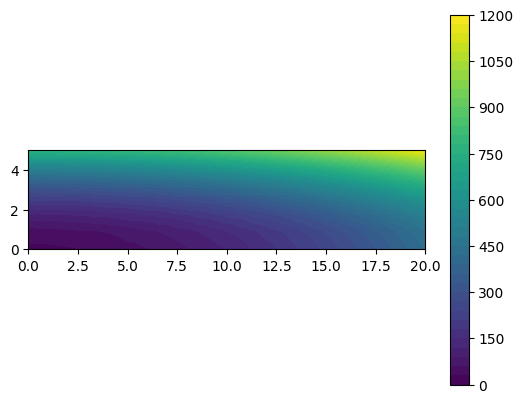

In [5]:
heat = gd.Heat(mesh_load,'Heat')
heat.solve()
heat.plot_solution()

In [6]:
data = gd.DataHeat(heat,mesh_load)
flux = data.flux(tags['interface'][0])
print(flux)

-402.5183552262896


Calling FFC just-in-time (JIT) compiler, this may take some time.


Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational p

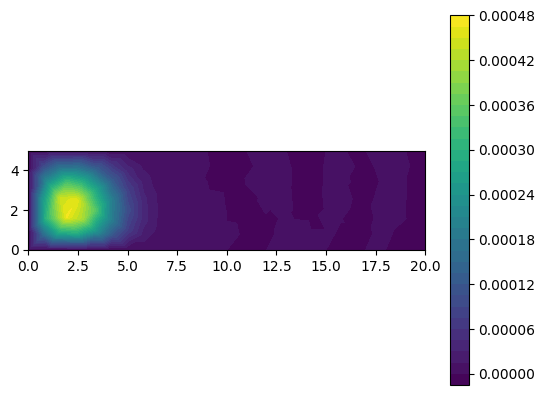

In [7]:
# diffusion of a gaussian function
heat_gaussian = gd.Heat(mesh_load,'Heat')
V = FunctionSpace(mesh_load.mesh,"CG",1)
k = Constant(1.0)
f = Constant(0.0)
bc = Constant(0.0)
u0 = Expression('exp(-a*pow(x[0], 2) - a*pow(x[1], 2))',degree=2, a=5)
dt = 2.0/ 50
T = 2.0
heat_gaussian.set_parameters(V,k,f,bc,u0,dt,T)
heat_gaussian.solve()
heat_gaussian.plot_solution()